# Predict ODE data

This notebook predicts ODE data via Neural Networks and compares the results to a naive approach of choosing the last measurement as the prediction.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from tensorflow import keras 
import random
import scipy
import pandas as pd
import time
from sklearn.metrics import mean_squared_error

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

In [3]:
start = time.time()
demonstration = "test"
print(demonstration)
end = time.time()
print("Time in s",end-start)

start = time.time() # Reset the time


test
Time in s 0.001010894775390625


In [4]:
X_train = pd.read_csv("X_train_LV.csv", index_col =0)
X_test = pd.read_csv("X_test_LV.csv", index_col =0)

# Predicting Prey
y_train_prey = pd.read_csv("y_train_Prey_LV.csv", index_col =0)
y_test_prey = pd.read_csv("y_test_Prey_LV.csv", index_col =0)

# Or Predicting Predators
y_train_predator = pd.read_csv("y_train_Predator_LV.csv", index_col =0)
y_test_predator = pd.read_csv("y_test_Predator_LV.csv", index_col =0)


## But now we can combine them!

y_train = pd.DataFrame()
y_train["Prey"] = y_train_prey
y_train["Predator"] = y_train_predator


y_test = pd.DataFrame()
y_test["Prey"] = y_test_prey
y_test["Predator"] = y_test_predator

## First: Predict only Prey

Start with single-layer networks and then look at multi-layer networks

In [5]:
D = X_train.shape[1]  # how many input variables per time step
I = y_train_prey.shape[1]  # how many output variables?

print(D,I)

2 1


21/21 [==============================] - 0s 3ms/step
Error for Prey Prediction is 0.01981


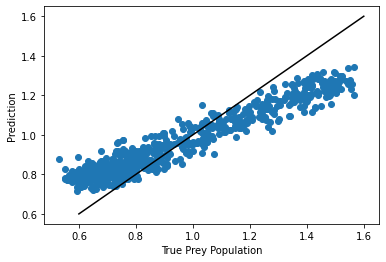

In [6]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_prey,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_prey)
print("Error for Prey Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_prey, y_hat)
plt.plot([0.6,1.6],[0.6,1.6],color="k")
plt.xlabel("True Prey Population")
plt.ylabel("Prediction")
plt.show()

##### Next Attempt: Larger number of neurons in single layer

21/21 [==============================] - 0s 3ms/step
Error for Prey Prediction is 0.00765


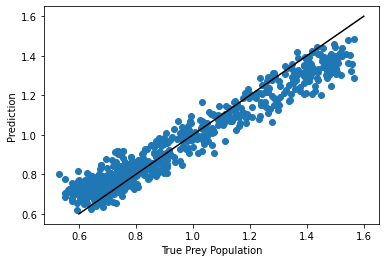

In [7]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =32, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_prey,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_prey)
print("Error for Prey Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_prey, y_hat)
plt.plot([0.6,1.6],[0.6,1.6],color="k")
plt.xlabel("True Prey Population")
plt.ylabel("Prediction")
plt.show()

#### Even slightly more

21/21 [==============================] - 0s 3ms/step
Error for Prey Prediction is 0.00597


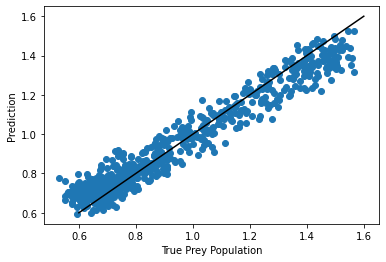

In [8]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =64, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_prey,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_prey)
print("Error for Prey Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_prey, y_hat)
plt.plot([0.6,1.6],[0.6,1.6],color="k")
plt.xlabel("True Prey Population")
plt.ylabel("Prediction")
plt.show()

#### Now two (small) layers

21/21 [==============================] - 0s 4ms/step
Error for Prey Prediction is 0.0145


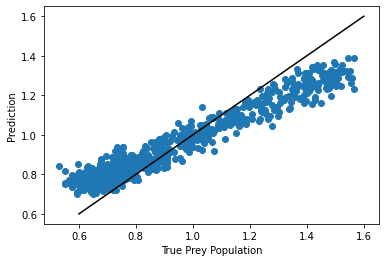

In [9]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units =4, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_prey,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_prey)
print("Error for Prey Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_prey, y_hat)
plt.plot([0.6,1.6],[0.6,1.6],color="k")
plt.xlabel("True Prey Population")
plt.ylabel("Prediction")
plt.show()

21/21 [==============================] - 0s 3ms/step
Error for Prey Prediction is 0.01546


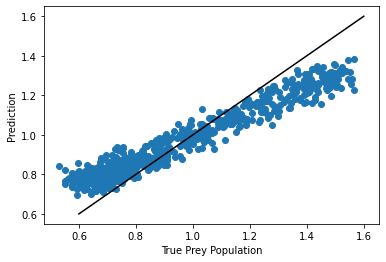

In [10]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units = 8, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units = 8, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_prey,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_prey)
print("Error for Prey Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_prey, y_hat)
plt.plot([0.6,1.6],[0.6,1.6],color="k")
plt.xlabel("True Prey Population")
plt.ylabel("Prediction")
plt.show()

## Confirming for Predator Prediction

We won't test everything here, but just look if the general performance seems similar for this single-output-task.

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.01195


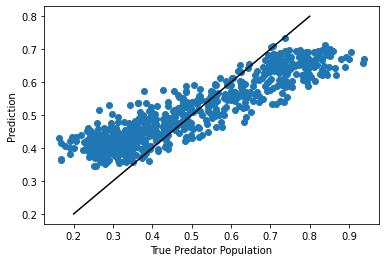

In [11]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_predator,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_predator)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_predator, y_hat)
plt.plot([0.2,0.8],[0.2,0.8],color="k")
plt.xlabel("True Predator Population")
plt.ylabel("Prediction")
plt.show()

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.00475


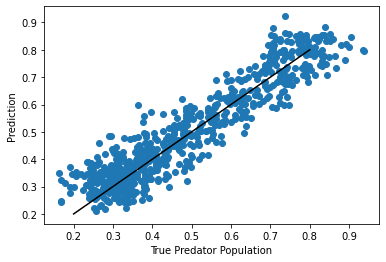

In [12]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =64, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_predator,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_predator)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_predator, y_hat)
plt.plot([0.2,0.8],[0.2,0.8],color="k")
plt.xlabel("True Predator Population")
plt.ylabel("Prediction")
plt.show()

#### Two Layers

21/21 [==============================] - 0s 4ms/step
Error for Predator Prediction is 0.01025


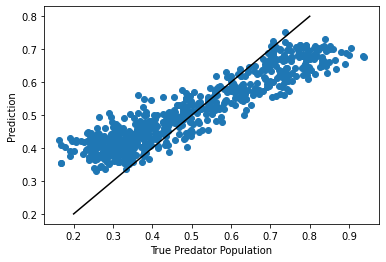

In [13]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units =4, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train_predator,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test_predator)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_test_predator, y_hat)
plt.plot([0.2,0.8],[0.2,0.8],color="k")
plt.xlabel("True Predator Population")
plt.ylabel("Prediction")
plt.show()

# Double Output
Predict predator and prey simulataneously

## Single Layers

Start small and increase number of units 

In [14]:
D = X_train.shape[1]  # how many input variables per time step
I = y_train.shape[1]  # how many output variables?

print(D,I)

2 2


21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.02323


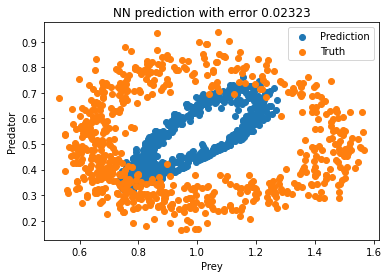

In [15]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.00644


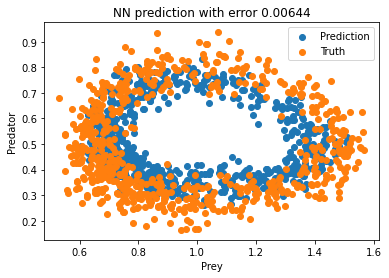

In [16]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =32, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.00532


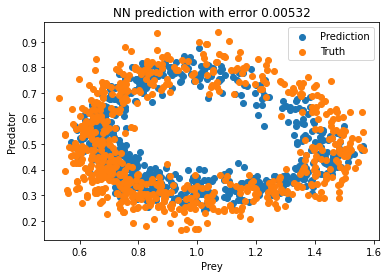

In [17]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =64, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()

## Two Layers

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.03141


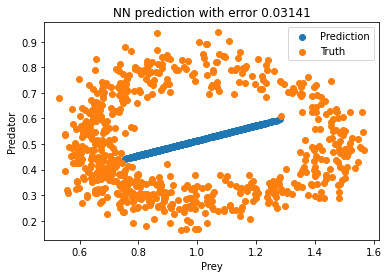

In [18]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units =4, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()

This looks like some kind of artefact and may disappear if you re-run the model fitting (fitting is stochastic and not deterministic so running it again and again might lead to different results).

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.01414


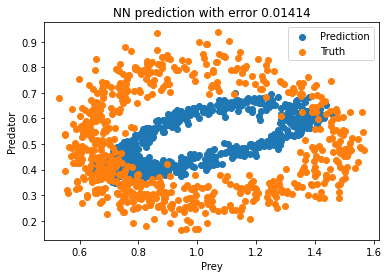

In [19]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =16, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units =8, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()

21/21 [==============================] - 0s 3ms/step
Error for Predator Prediction is 0.00628


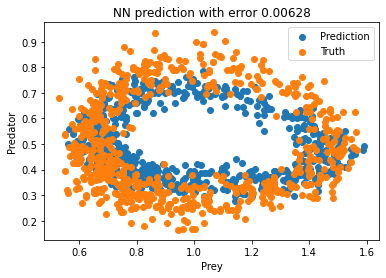

In [20]:

model = keras.models.Sequential([

# Input layer
keras.layers.Flatten( input_shape=[ D ]),
    
# hidden layers
keras.layers.Dense(units =32, kernel_initializer='normal',activation='relu'),
keras.layers.Dense(units =16, kernel_initializer='normal',activation='relu'),

# Output layer    
keras.layers.Dense(I)  # we want to predict one time step with I measurements
])

# Fitting
model.compile(optimizer="Adam", loss="mse")
model.fit(X_train, y_train,
         epochs = 20, verbose = False)

# Get error
y_hat = model.predict(X_test)
Error = mean_squared_error(y_hat,y_test)
print("Error for Predator Prediction is",np.round(Error,5))

# Plotting Results
plt.scatter(y_hat[:,0],
           y_hat[:,1], label="Prediction")
plt.scatter(y_test.Prey, y_test.Predator, label ="Truth")
plt.legend()
plt.xlabel("Prey")
plt.ylabel("Predator")
plt.title("NN prediction with error "+str(np.round(Error,5)))
plt.show()